# PyTorch Neural Network Classification

# Introduction to Neural Network Classification with PyTorch

Welcome to this comprehensive guide on neural network classification using PyTorch! This notebook will take you through the fundamentals of classification tasks, from basic concepts to practical implementation.

## What is Classification?
Classification is a type of supervised learning where the goal is to predict categorical labels for input data. For example:
- Predicting whether an email is spam or not (binary classification)
- Identifying which type of flower a plant is (multiclass classification)
- Determining the sentiment of a text (positive, negative, or neutral)

## Key Concepts You'll Learn
1. Basic architecture of classification neural networks
2. Different types of classification problems
3. Common activation functions and their uses
4. Loss functions for classification
5. Model training and evaluation
6. Practical implementation using PyTorch

## Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.

## Imports

In [1]:
import requests
import numpy as np 
import pandas as pd 
import torch 
import matplotlib.pyplot as plt

from torch import nn
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from pathlib import Path 


In [2]:
if Path('helper_function.py').is_file():
    print("File already exist")
else: 
    print('Downloading File')
    file_link = f'https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py'
    request = requests.get(file_link)
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)


In [3]:
from helper_functions import plot_decision_boundary, plot_predictions


In [4]:
%load_ext autoreload
%autoreload 2 


In [5]:
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'SEED: {SEED}')
print(f'Device: {device}')
print(f'torch version: {torch.__version__}')


SEED: 42
Device: cuda
torch version: 2.7.0+cu126


## Building Dataset

## Data Preparation

Let's start by creating some synthetic data for our classification task. We'll use scikit-learn's `make_circles` function to generate a binary classification dataset.

### Key Points:
- We'll create a 2D dataset where points are arranged in concentric circles
- This will help us visualize how our neural network learns to separate different classes
- The dataset will have 1000 samples with 2 features (x and y coordinates)

In [6]:
# Will be using the sklearn.datasets -> make_circles 

# Number of samples 
n_samples = 1000

X, Y = make_circles(
    n_samples= n_samples,
    noise= 0.03, 
    random_state= SEED
)


# sklearn.datasets.make_circles -> gives a 2d circle containing a smaller circle (X:(n_sample, 2), Y:1 or 0)


In [7]:
print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")


Shape of X: (1000, 2)
Shape of Y: (1000,)


In [8]:
circles = pd.DataFrame({"X1": X[:, 0],
                   "X2": X[:, 1],
                   'Y': Y})

circles.head(10)


,X1,X2,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [9]:
circles.Y.value_counts()


Y
1    500
0    500
Name: count, dtype: int64

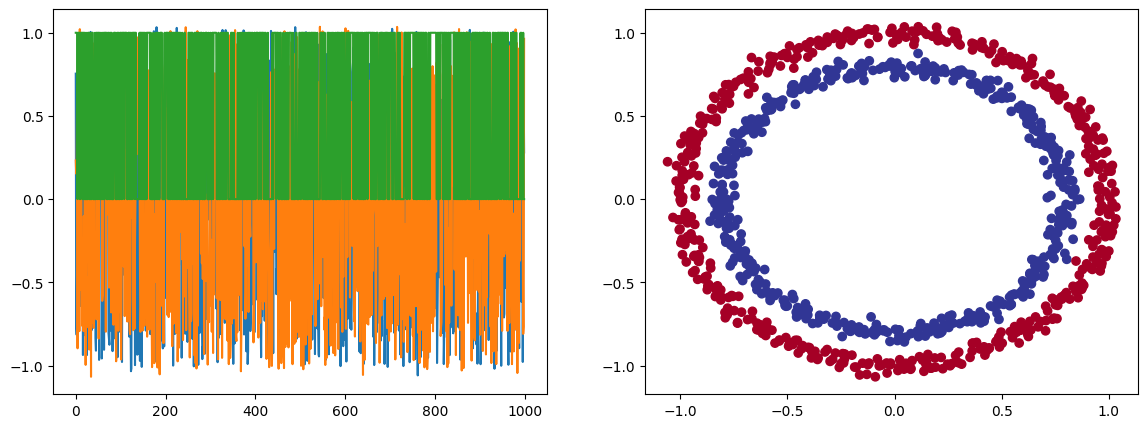

In [10]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(circles)
plt.subplot(1,2,2)
plt.scatter(
    x= X[:, 0],
    y= X[:, 1],
    c=Y,
    cmap=plt.cm.RdYlBu
);


**TASK :** 

Our task is to predict if it a blue dot or the red dot if the given values are for the inner circle or the outer circle

In [11]:
# Changing the data to tensor 
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(Y).type(torch.float)

print(f'type: {type(X)}, Dtype: {X.dtype}')


type: <class 'torch.Tensor'>, Dtype: torch.float32


In [12]:
# Splitting the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.2, # 20% of the data
    random_state= SEED
)

len(X_train), len(y_train), len(X_test), len(y_test)


(800, 800, 200, 200)

## Building a Model

1. Setup Device agnostic code
2. Construct a model subclass `nn.Module`
3. Define the loss and optimizer
4. Training loop

In [13]:
print(device)


cuda


In [14]:
class CircleModelV0(nn.Module):
    """
    A simple two-layer feedforward neural network for binary classification.

    This model is designed for datasets with two input features (e.g., x1, x2) and a binary output.
    It consists of two fully connected (linear) layers:
      - Layer 1: Maps 2 input features to 5 hidden units.
      - Layer 2: Maps 5 hidden units to 1 output (for binary classification).

    Example usage:
        model = CircleModelV0()
        output = model(torch.randn(10, 2))  # Forward pass with batch of 10 samples

    Attributes:
        Layer1 (nn.Linear): First linear layer (input: 2, output: 5).
        Layer2 (nn.Linear): Second linear layer (input: 5, output: 1).
    """
    def __init__(self):
        """
        Initializes the CircleModelV0 with two linear layers.
        """
        super().__init__()
        self.Layer1 = nn.Linear(in_features=2, out_features=5)
        self.Layer2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor of shape (batch_size, 2).

        Returns:
            torch.Tensor: Output tensor of shape (batch_size, 1).
        """
        self.out = self.Layer2(self.Layer1(x))
        return self.out


In [15]:
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (Layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
print(f"Stuff that is there in model.parameters(): \n{next(model_0.parameters())},\nStuff inside of model.state_dict: \n{model_0.state_dict()}")


Stuff that is there in model.parameters(): 
Parameter containing:
tensor([[-0.6174, -0.6222],
        [-0.0594, -0.0111],
        [ 0.0916,  0.2044],
        [ 0.5379,  0.6124],
        [ 0.0396,  0.6670]], device='cuda:0', requires_grad=True),
Stuff inside of model.state_dict: 
OrderedDict([('Layer1.weight', tensor([[-0.6174, -0.6222],
        [-0.0594, -0.0111],
        [ 0.0916,  0.2044],
        [ 0.5379,  0.6124],
        [ 0.0396,  0.6670]], device='cuda:0')), ('Layer1.bias', tensor([ 0.2458, -0.5301,  0.5651, -0.4786, -0.6144], device='cuda:0')), ('Layer2.weight', tensor([[0.3693, 0.1712, 0.0700, 0.2097, 0.0148]], device='cuda:0')), ('Layer2.bias', tensor([-0.3490], device='cuda:0'))])


In [17]:
# nn.Sequential(): 
# Modules will be added to it in the order they are passed in the constructor
# The forward() method of Sequential accepts any input and forwards 
# it to the first module it contains. It then “chains” outputs to inputs sequentially 
# for each subsequent module, finally returning the output of the last module.

nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)



Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
X_test.dtype


torch.float32

In [19]:
with torch.inference_mode():
    untrained_pred = model_0(X_test.to(device))


In [20]:
print(f"First 10 prediction made by the model {untrained_pred[:10]}")


First 10 prediction made by the model tensor([[-0.4283],
        [-0.4965],
        [-0.3107],
        [-0.4614],
        [-0.4076],
        [-0.4485],
        [-0.5637],
        [-0.5527],
        [-0.3067],
        [-0.5022]], device='cuda:0')


**🔹 Entropy (Information Theory)**

Entropy is a concept from information theory that quantifies the uncertainty or surprise of a probability distribution.

For a true distribution P, the entropy is:

$$H(P) = -\sum_i P(i) \log P(i)$$

This tells us how “unpredictable” a distribution is. For example:
* A fair coin has high entropy.	
* A biased coin (e.g. 99% heads) has low entropy.	

_______________

**🔹 Cross-Entropy (Loss Function)**

In machine learning, we usually have:
* A true distribution P (e.g. one-hot label).	
* A predicted distribution Q (from the model, e.g. softmax output).	

The cross-entropy between them is:

$$H(P, Q) = -\sum_i P(i) \log Q(i)$$

If P is a one-hot vector (e.g., for class 2 out of 5 classes: P = [0, 0, 1, 0, 0]), this simplifies to:	

$$H(P, Q) = -\log Q(\text{true class})$$

How Entropy Relates to Loss	
* Loss measures how bad a model’s prediction is.	
* Cross-entropy loss penalizes the model more when it assigns low probability to the correct class.	
* Lower cross-entropy → predictions closer to the truth.	
* Higher entropy in predictions → more uncertainty/confusion.	


In [21]:
# We will be using the binary-cross-entropy loss with logits loss 
# so sigmoid - it just give us the probability distribution -> logits 
# why are we using the binary cross-entropy loss - we want to quantify our loss like if we are wrong how much are we wrong 
# secondly if we get a high cross-entropy that means huge amount of uncertainty which is not good 
# if we use something as mean squared in that case it will be wether we predicted correct label or not 
# with cross entropy we have probability for both the class or as many class we have 
# so in this case our model tell us it is 99% sure its the inner circle and 1% sure it outer circle 
# this is necessary as now we have a way to adjust our model to improve its predictions

loss_fn = nn.BCEWithLogitsLoss() # this is with a sigmoid activation 

optim = torch.optim.SGD(params=model_0.parameters(), lr= 0.1)

# Calculate accuracy - out of 100 examples what percentage our models get's correct 
# Accuracy = (True positive / (True positive + True negative) )* 100

# def accuracy_fn(y_true, y_pred):
#     correct = torch.eq(y_true,y_pred).sum().item()
#     acc = (correct / len(y_pred)) * 100
#     return acc

accuracy_fn = lambda y_true, y_pred : (torch.eq(y_true, y_pred).sum().item()/ len(y_pred)) * 100


## Training loop 



In [22]:
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (Layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
epochs = 100
SEEDS = 42

torch.manual_seed(SEEDS)

# Moving everything to device 
X_train , X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()

optim = torch.optim.SGD(params=model_0.parameters(),
                        lr = 0.1)

accuracy_fn = lambda y_true, y_pred: (torch.eq(y_true, y_pred).sum().item()/ len(y_pred)) * 100

# training loop 
for epoch in range(epochs):
    # setting the training mode
    model_0.train()


    y_logits = model_0(X_train).squeeze() # to remove the extra dim it is going to of the shape - [len(x_train), 1]


    y_pred = torch.round(torch.sigmoid(y_logits)) # converting the logits to probability and rounding them up

    loss = loss_fn(y_logits, y_train) 

    acc = accuracy_fn(y_train, y_pred)

    # Set the gradient to zeros
    optim.zero_grad()

    # Backward pass
    loss.backward()

    # stepping up the optimizer to make the changes in the weights and bias 
    optim.step()

    # Evaluation 
    model_0.eval()
    with torch.inference_mode():

        # test loss and accuracy
        y_test_logits = model_0(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))

        loss_test = loss_fn(y_test_logits, y_test)
        test_acc = accuracy_fn(y_test, y_test_pred)
    
    # Printing the observations 
    if epoch % 10 == 0: 
        print(f'Epoch {epoch}: Train => Loss: {loss:.2f}, Accuracy: {acc:.2f} | Test => Loss: {loss_test:.2f}, Accuracy: {test_acc:.2f} ')


Epoch 0: Train => Loss: 0.75, Accuracy: 50.00 | Test => Loss: 0.74, Accuracy: 50.00 
Epoch 10: Train => Loss: 0.72, Accuracy: 50.00 | Test => Loss: 0.71, Accuracy: 50.00 
Epoch 20: Train => Loss: 0.70, Accuracy: 50.00 | Test => Loss: 0.70, Accuracy: 50.00 
Epoch 30: Train => Loss: 0.70, Accuracy: 50.00 | Test => Loss: 0.69, Accuracy: 50.00 
Epoch 40: Train => Loss: 0.70, Accuracy: 50.00 | Test => Loss: 0.69, Accuracy: 50.00 
Epoch 50: Train => Loss: 0.69, Accuracy: 50.00 | Test => Loss: 0.69, Accuracy: 50.00 
Epoch 60: Train => Loss: 0.69, Accuracy: 50.00 | Test => Loss: 0.69, Accuracy: 50.00 
Epoch 70: Train => Loss: 0.69, Accuracy: 52.62 | Test => Loss: 0.69, Accuracy: 54.50 
Epoch 80: Train => Loss: 0.69, Accuracy: 58.00 | Test => Loss: 0.69, Accuracy: 57.00 
Epoch 90: Train => Loss: 0.69, Accuracy: 53.50 | Test => Loss: 0.69, Accuracy: 54.00 


## Fixing the model

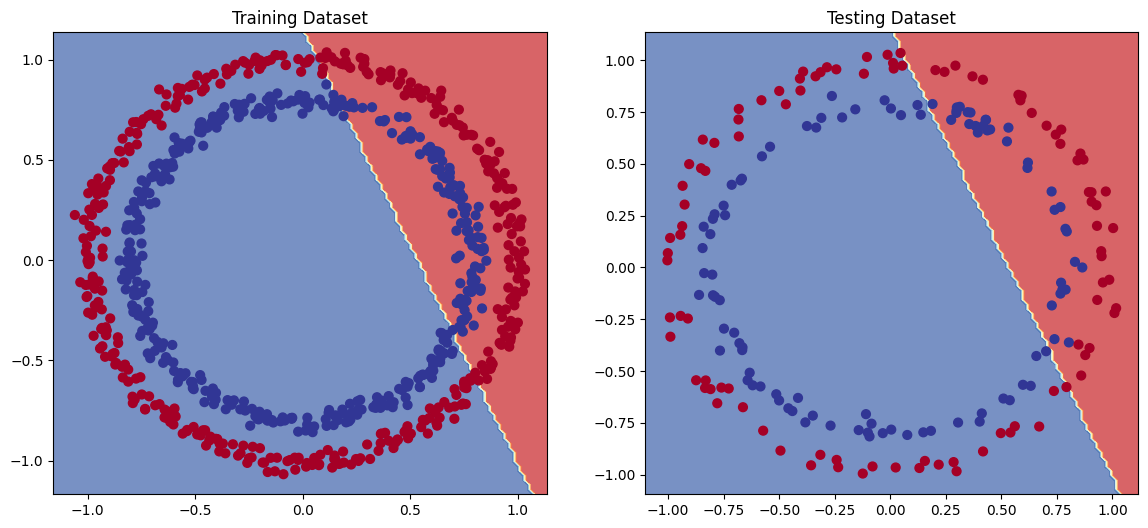

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title("Training Dataset")
plot_decision_boundary(model_0, X_train, y_train);
plt.subplot(122)
plt.title("Testing Dataset")
plot_decision_boundary(model_0, X_test, y_test);
plt.show()


In [25]:
# So in the above plots we can clearly see that our model is not learning the decision boundary correctly and that why it making so wrong predictions 
# the model is trying to split the red and blue dot using straight line 


## Improving the model

1. Adding more Layers
2. Adding more hidden units
3. Fit for longer
4. Changing the activation functions 
5. Changing the loss functions


In [26]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=2, out_features=10) # adding more hidden units 
        self.Layer2 = nn.Linear(in_features= 10, out_features=10) # Extra layer
        self.Layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        self.out = self.Layer3(self.Layer2(self.Layer1(x)))
        return self.out

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (Layer1): Linear(in_features=2, out_features=10, bias=True)
  (Layer2): Linear(in_features=10, out_features=10, bias=True)
  (Layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.1)


In [28]:
# Training loop 
epochs = 1000 # Training for longer 

torch.manual_seed(SEED)

X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)


for epoch in range(epochs):
    # set the model to train mode 
    # pass the data in the forward method 
    # logits to sigmoid to get probs 
    # loss and accuracy 
    # optimizer set to zero_grad
    # backward pass loss.backward()
    # optimizer.step()
    # model.eval() + inference_mode()
    # testing data same stuff 
    # printing the results 

    model_1.train()

    logits = model_1(X_train).squeeze()
    preds = torch.round(torch.sigmoid(logits))

    loss = loss_fn(logits, y_train)
    acc = accuracy_fn(y_train, preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)
    
    if epoch % 100 == 0 : 
        print(f'Epoch {epoch}: Train => Loss: {loss:.2f}, Accuracy: {acc:.2f} | Test => Loss: {test_loss:.2f}, Accuracy: {test_acc:.2f} ')


Epoch 0: Train => Loss: 0.69, Accuracy: 50.88 | Test => Loss: 0.69, Accuracy: 51.00 
Epoch 100: Train => Loss: 0.69, Accuracy: 50.38 | Test => Loss: 0.69, Accuracy: 48.00 
Epoch 200: Train => Loss: 0.69, Accuracy: 51.12 | Test => Loss: 0.69, Accuracy: 46.00 
Epoch 300: Train => Loss: 0.69, Accuracy: 51.62 | Test => Loss: 0.69, Accuracy: 45.00 
Epoch 400: Train => Loss: 0.69, Accuracy: 51.12 | Test => Loss: 0.69, Accuracy: 46.00 
Epoch 500: Train => Loss: 0.69, Accuracy: 51.00 | Test => Loss: 0.69, Accuracy: 46.00 
Epoch 600: Train => Loss: 0.69, Accuracy: 51.00 | Test => Loss: 0.69, Accuracy: 46.00 
Epoch 700: Train => Loss: 0.69, Accuracy: 51.00 | Test => Loss: 0.69, Accuracy: 46.00 
Epoch 800: Train => Loss: 0.69, Accuracy: 51.00 | Test => Loss: 0.69, Accuracy: 46.00 
Epoch 900: Train => Loss: 0.69, Accuracy: 51.00 | Test => Loss: 0.69, Accuracy: 46.00 


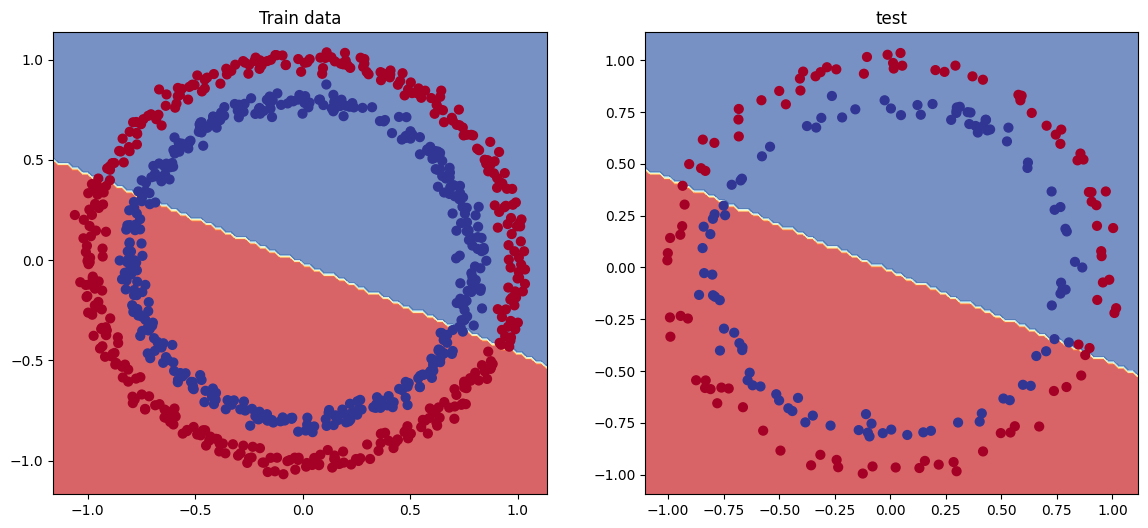

In [29]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_decision_boundary(model_1, X_train, y_train)
plt.title("Train data")
plt.subplot(122)
plot_decision_boundary(model_1, X_test, y_test)
plt.title("test")
plt.show()


Its the same no changes in the loss or accuracy, lets test for some random data 

In [30]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [31]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))


80 80 20 20


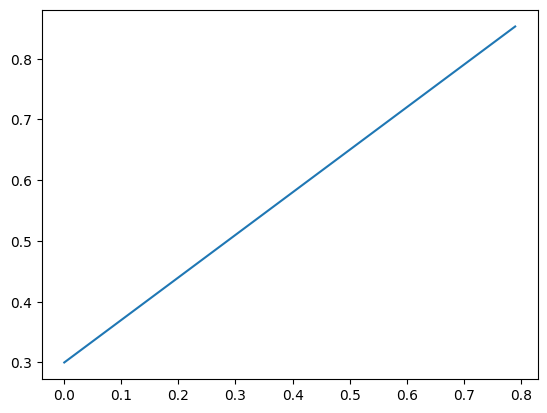

In [32]:
plt.plot(X_train_regression, y_train_regression);


In [33]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)


In [35]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


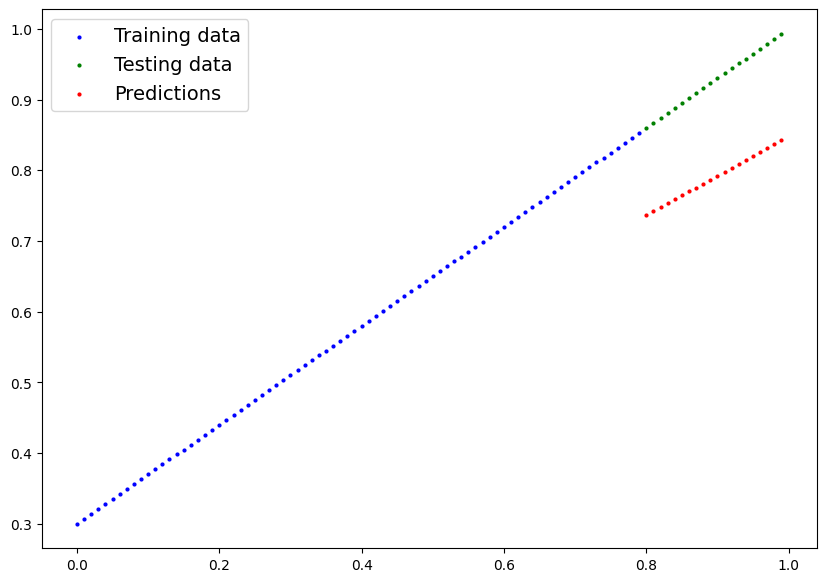

In [36]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());


Our model has the capacity to learn or generalize on the given data so what is causing the issue on the     
make_circle data

## The Missing Piece

**Non-Linearity**

In [37]:
# model_3 = nn.Sequential(
#     nn.Linear(in_features=2, out_features=10),
#     nn.ReLU(),
#     nn.Linear(in_features=10, out_features=10),
#     nn.ReLU(),
#     nn.Linear(in_features=10, out_features=1)
# ).to(device=device)

# model_3


In [38]:
# Dataset
n_samples = 1000
SEED = 42

X, Y = make_circles(
    n_samples= n_samples,
    noise= 0.03, 
    random_state= SEED
)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(Y).type(torch.float)

print(f'type: {type(X)}, Dtype: {X.dtype}')


X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.2, # 20% of the data
    random_state= SEED
)

len(X_train), len(y_train), len(X_test), len(y_test)


type: <class 'torch.Tensor'>, Dtype: torch.float32


(800, 800, 200, 200)

In [39]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # non-linear activation

    def forward(self, x):
        # Where to put non-linear activations
        return self.layer_3(
            self.relu(
                self.layer_2(
                    self.relu(
                        self.layer_1(x)
                    )
                )
            )
        )
    
model_3 = CircleModelV3().to(device)
model_3


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [40]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params= model_3.parameters(), lr=0.1)


In [41]:
device


'cuda'

Epoch: 0 | Train loss: 0.69295, Test loss: 0.69319


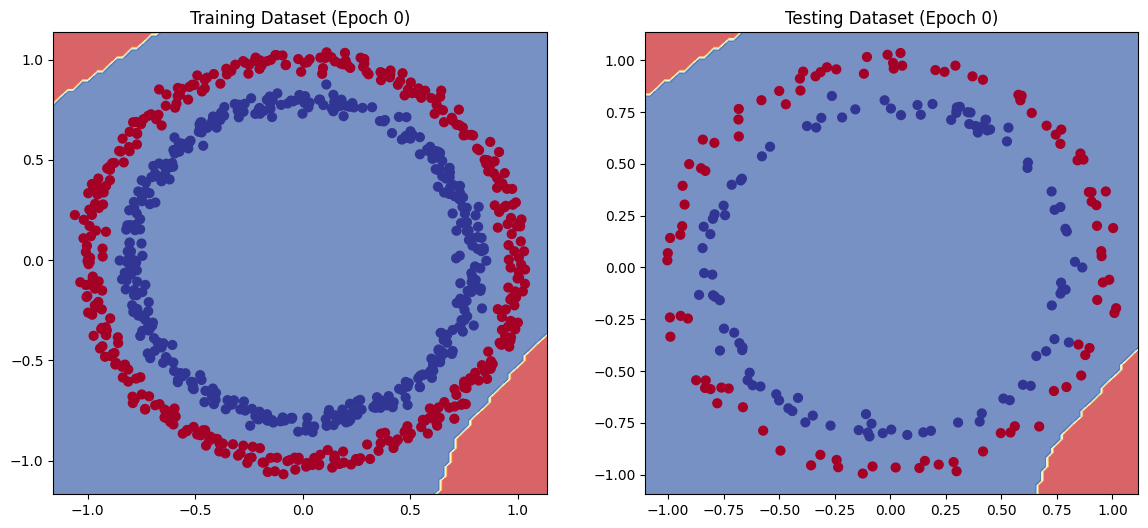

Epoch: 1000 | Train loss: 0.56818, Test loss: 0.57378


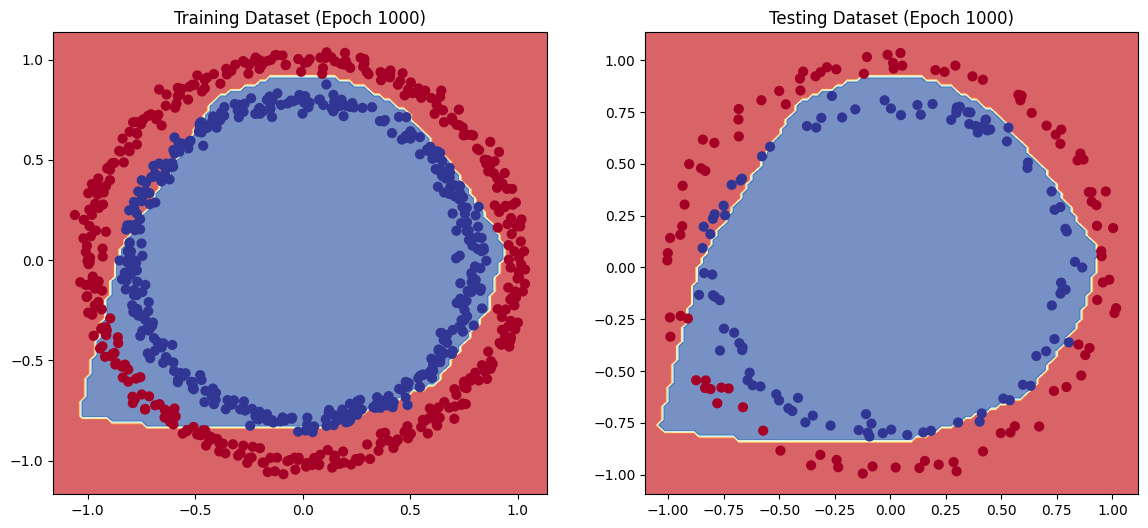

Epoch: 2000 | Train loss: 0.04176, Test loss: 0.06583


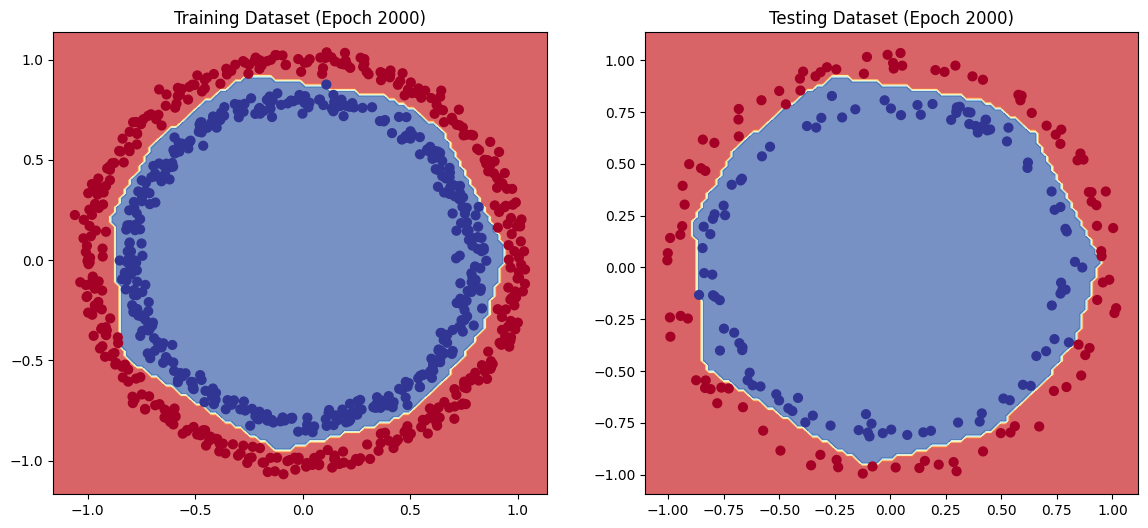

Epoch: 3000 | Train loss: 0.01672, Test loss: 0.03363


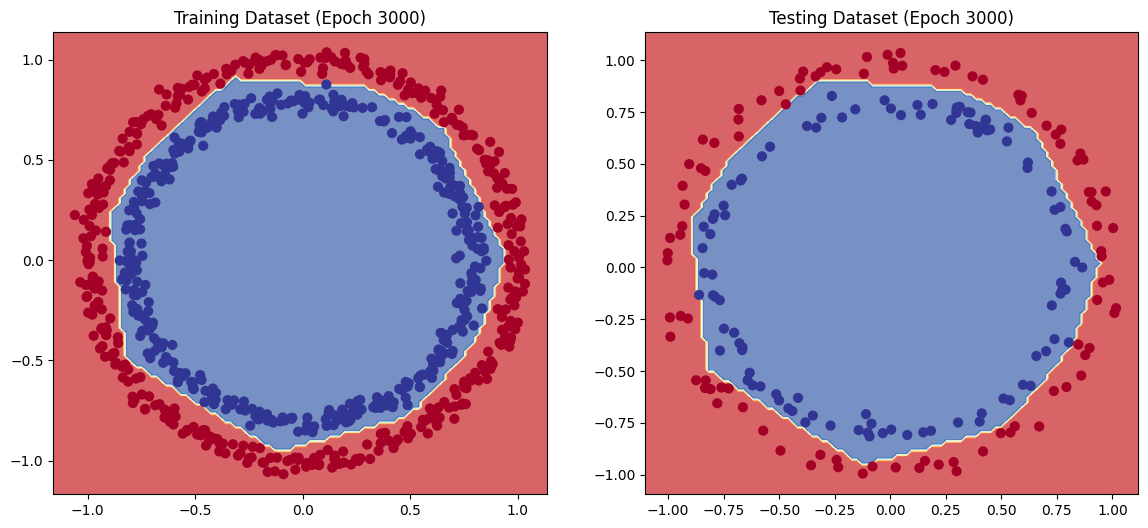

Epoch: 4000 | Train loss: 0.01048, Test loss: 0.02451


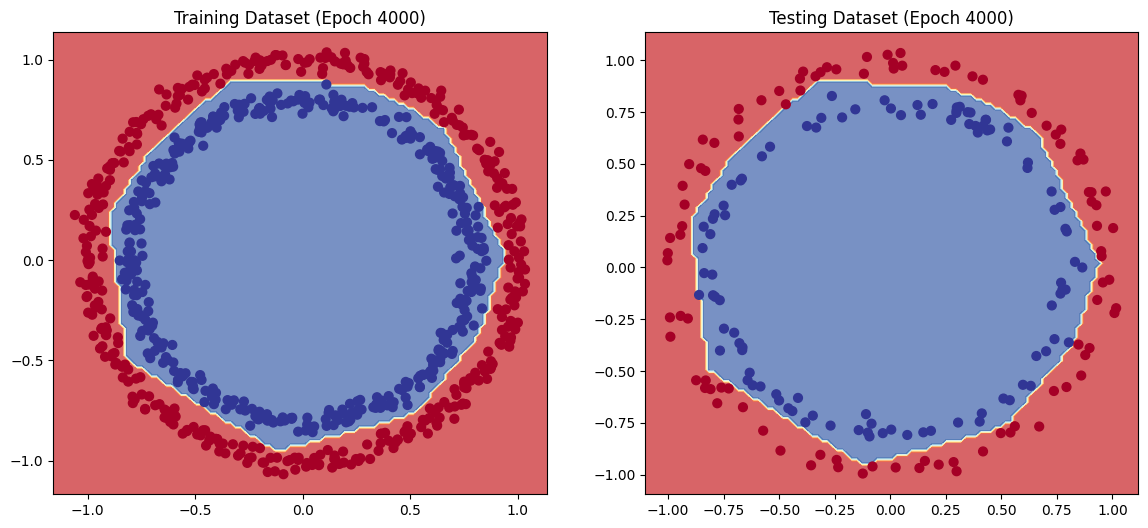

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Moving everything to device 
X_train , X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

X_train_copy = X_train.clone()
X_test_copy = X_test.clone()
y_train_copy = y_train.clone()
y_test_copy = y_test.clone()

epochs = 5000

for epoch in range(epochs):
    model_3.train()
    X_train , X_test = X_train.to(device), X_test.to(device)
    y_train, y_test = y_train.to(device), y_test.to(device)
    logits = model_3(X_train).squeeze()
    preds = torch.round(torch.sigmoid(logits))
    loss = loss_fn(logits, y_train)
    acc = accuracy_fn(y_train, preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 1000 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")
        # Plot decision boundary for both train and test sets
        plt.figure(figsize=(14, 6))
        plt.subplot(121)
        plt.title(f"Training Dataset (Epoch {epoch})")
        plot_decision_boundary(model_3, X_train_copy, y_train_copy)
        plt.subplot(122)
        plt.title(f"Testing Dataset (Epoch {epoch})")
        plot_decision_boundary(model_3, X_test_copy, y_test_copy)
        model_3.to(device)
        plt.show()


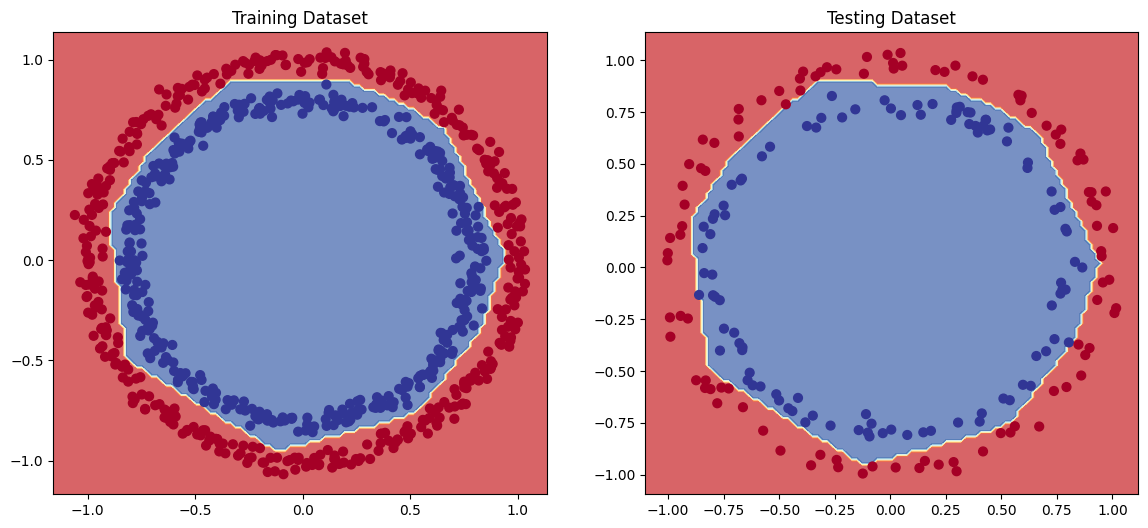

In [43]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title("Training Dataset")
plot_decision_boundary(model_3, X_train, y_train);
plt.subplot(122)
plt.title("Testing Dataset")
plot_decision_boundary(model_3, X_test, y_test);
plt.show()


## Practical Tips for Classification

1. **Data Preprocessing**:
   - Always normalize/standardize your input features
   - Split your data into training and validation sets
   - Use appropriate batch sizes based on your dataset size

2. **Model Architecture**:
   - Start simple and gradually increase complexity
   - Use dropout layers to prevent overfitting
   - Experiment with different activation functions

3. **Training**:
   - Use learning rate scheduling
   - Monitor training and validation loss
   - Use early stopping to prevent overfitting

4. **Evaluation**:
   - Use appropriate metrics (accuracy, precision, recall, F1-score)
   - Create confusion matrices
   - Visualize decision boundaries

## Replicating the ReLU and Sigmoid Activation

In [44]:
A = torch.arange(start=-10, end=10, step= 1)
A


tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [45]:
def relu(x):
    return torch.maximum(torch.tensor(0), x)


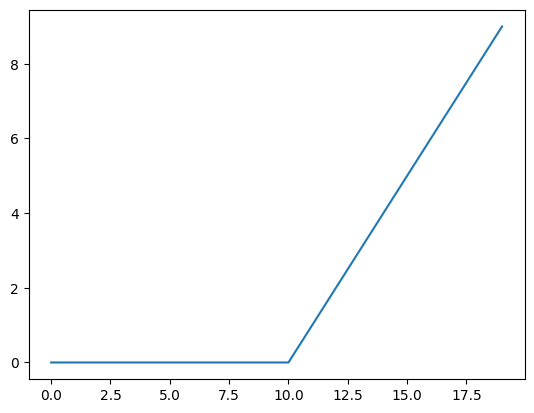

In [46]:
relu(A)
plt.plot(relu(A));


In [47]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


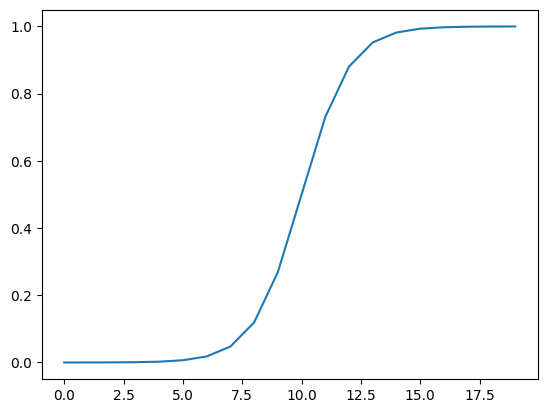

In [48]:
plt.plot(sigmoid(A));


## Multi-Class Classification

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


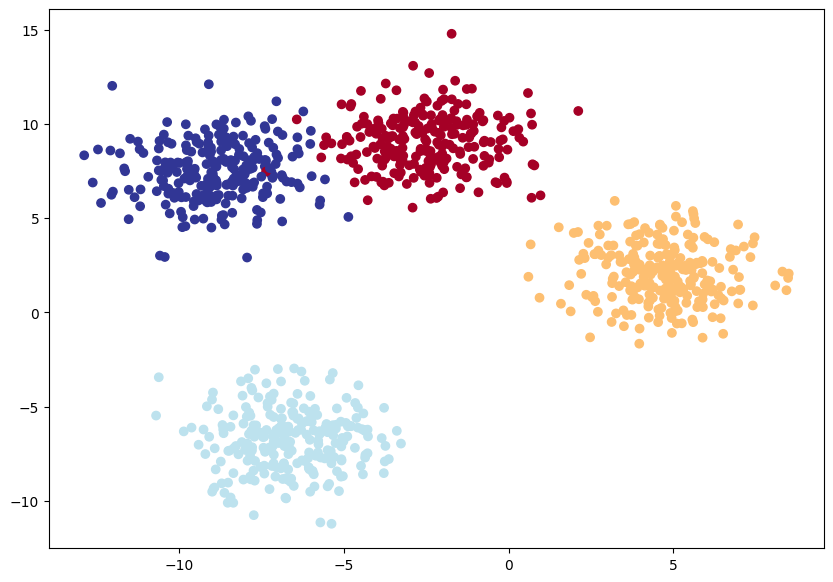

In [49]:

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);


In [56]:
class BlobModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(), # Do we need relu activation for this dataset
            nn.Linear(in_features=8, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=4)
        )
    
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model_4 = BlobModel().to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [57]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)


In [58]:
model_4(X_blob_train.to(device))[:5].shape


torch.Size([5, 4])

Softmax and sigmoid are activation functions used in machine learning, specifically for classification tasks.   
While both convert raw output scores into probabilities, they are used for different types of classification:   
sigmoid for binary classification and softmax for multi-class classification.      

Key Differences: 
* Purpose: 
    Sigmoid is used for binary classification (two classes) where the model predicts the probability of  
    belonging to one class, while softmax is used for multi-class classification (more than two classes)    
    where the model predicts a probability distribution over all classes. 

* Output:
    Sigmoid outputs a single probability between 0 and 1, representing the likelihood of belonging to the positive class.   
    Softmax outputs a probability distribution over all classes, ensuring the sum of probabilities for all classes equals 1. 

* Application:    
    Sigmoid is suitable for scenarios like predicting whether an email is spam or not spam.     
    Softmax is suitable for scenarios like image recognition where the model needs to       
    classify an image into multiple categories (e.g., cat, dog, car).       

Mathematical Formula:
Sigmoid: $$sigmoid(x) = 1 / (1 + e^(-x))$$
Softmax: $$softmax(z_i) = e^(z_i) / sum(e^(z_j))$$  
(where $z_i$ is the logit for class i, and the sum is over all classes j)

In [59]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test =  y_blob_train.to(device), y_blob_test.to(device) 

epochs = 5000
for epoch in range(epochs):
    model_4.train()

    logits = model_4(X_blob_train)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)
    loss = loss_fn(logits, y_blob_train)
    acc = accuracy_fn(y_blob_train, preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_blob_test, test_preds)

    if epoch % 100 == 0:
         print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")


Epoch: 0 | Train loss: 1.15883, Test loss: 1.07554
Epoch: 100 | Train loss: 0.03312, Test loss: 0.02433
Epoch: 200 | Train loss: 0.02657, Test loss: 0.01651
Epoch: 300 | Train loss: 0.02503, Test loss: 0.01440
Epoch: 400 | Train loss: 0.02427, Test loss: 0.01335
Epoch: 500 | Train loss: 0.02377, Test loss: 0.01269
Epoch: 600 | Train loss: 0.02339, Test loss: 0.01218
Epoch: 700 | Train loss: 0.02307, Test loss: 0.01179
Epoch: 800 | Train loss: 0.02279, Test loss: 0.01147
Epoch: 900 | Train loss: 0.02253, Test loss: 0.01120
Epoch: 1000 | Train loss: 0.02230, Test loss: 0.01095
Epoch: 1100 | Train loss: 0.02207, Test loss: 0.01073
Epoch: 1200 | Train loss: 0.02186, Test loss: 0.01052
Epoch: 1300 | Train loss: 0.02167, Test loss: 0.01033
Epoch: 1400 | Train loss: 0.02147, Test loss: 0.01015
Epoch: 1500 | Train loss: 0.02129, Test loss: 0.00998
Epoch: 1600 | Train loss: 0.02111, Test loss: 0.00982
Epoch: 1700 | Train loss: 0.02094, Test loss: 0.00966
Epoch: 1800 | Train loss: 0.02078, Test 

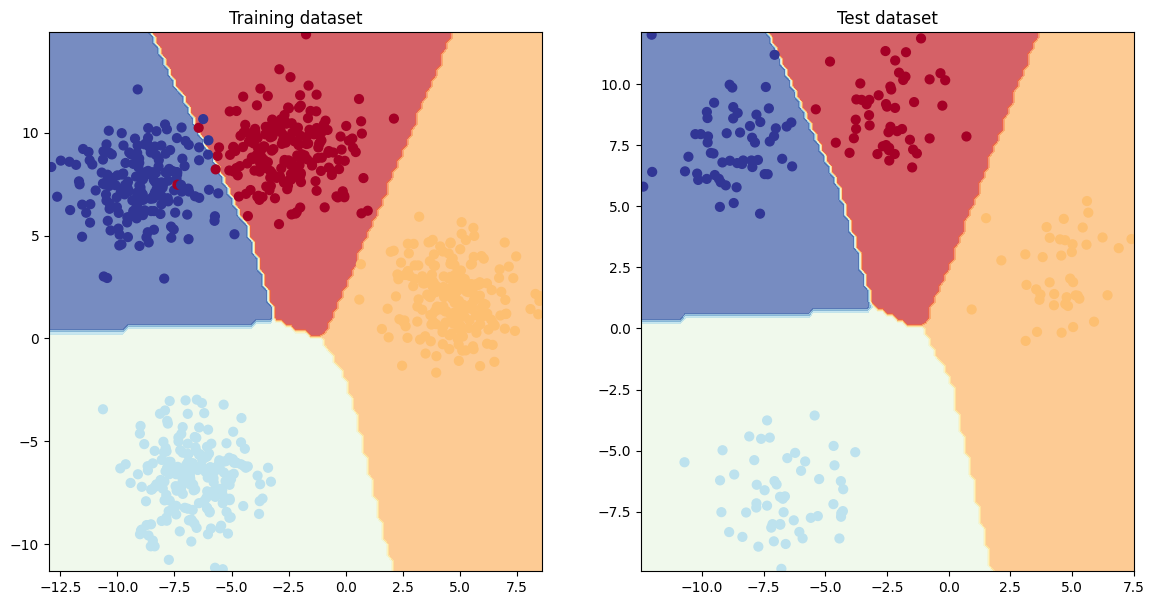

In [60]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.title('Training dataset')
plt.subplot(122)
plt.title("Test dataset")
plot_decision_boundary(model_4, X_blob_test, y_blob_test);


In [66]:
# Inference from the model 
model_4.to(device)
with torch.inference_mode():
    logits = model_4(X_blob_test.to(device))
    print(logits.shape)
    # so what this will do is this will calculate the probability for all the 4 values in each rows 
    probs = torch.softmax(logits, dim=1) 
    acc = accuracy_fn(torch.argmax(probs, dim=1), y_blob_test)
    print(torch.argmax(probs, dim=1)[:5])
    print(acc)


torch.Size([200, 4])
tensor([1, 3, 2, 1, 0], device='cuda:0')
100.0


In [67]:
y_blob_test[:5]


tensor([1, 3, 2, 1, 0], device='cuda:0')

## 9. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/), especially the [TorchMetrics classification section](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html). 

Let's try the `torchmetrics.Accuracy` metric out.





In [68]:
try: 
    from trochmetrics import Accuracy
except:
    %pip install torchmetrics -qq
    from torchmetrics import Accuracy


Note: you may need to restart the kernel to use updated packages.


In [69]:
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(torch.argmax(probs, dim=1), y_blob_test)


tensor(1., device='cuda:0')